In [1]:
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim 
import torchvision
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image

from sklearn import datasets, svm, metrics

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
master_path = '/content/drive/My Drive/APS360 - Group 21/05 Data Processing/Sliding Window/Features'
dataset = torchvision.datasets.DatasetFolder(master_path, loader=torch.load, extensions=('.tensor'))

In [68]:
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])


# Prepare Dataloader - from sample code
data_loader = torch.utils.data.DataLoader(dataset, batch_size=800, num_workers=1, 
                                          shuffle=True)

# Verification Step - from sample code
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() 


In [69]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)
#0 is Empty
#1 is Occupied 
#2 is Trash

[[  0 330]
 [  1 344]
 [  2 126]]


In [70]:
data = []
for i, image in enumerate(images):
  data.append(image.flatten())

In [71]:
len(images)

800

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.1)

In [73]:
master_path = '/content/drive/My Drive/APS360 - Group 21/05 Data Processing/Sliding Window/Segmented7Features'
dataset = torchvision.datasets.DatasetFolder(master_path, loader=torch.load, extensions=('.tensor'))

In [74]:
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])


# Prepare Dataloader - from sample code
data_loader = torch.utils.data.DataLoader(dataset, batch_size=106, num_workers=1, 
                                          shuffle=True)

# Verification Step - from sample code
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() 

data = []
for i, image in enumerate(images):
  data.append(image.flatten())


In [75]:
mdl = svm.SVC(gamma=0.0001)
#fit to the trainin data
mdl.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.99)

In [77]:
test_score = mdl.score(X_test, y_test)
print('the accuracy on the: \n\t training data is {}'.format(round(train_score,3)))
print('\t testing data is {}'.format(round(test_score, 3)))

y_pred = mdl.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (mdl, metrics.classification_report(y_test, y_pred)))

the accuracy on the: 
	 training data is 0.913
	 testing data is 0.505
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       105
           1       0.00      0.00      0.00         0

    accuracy                           0.50       105
   macro avg       0.50      0.25      0.34       105
weighted avg       1.00      0.50      0.67       105




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


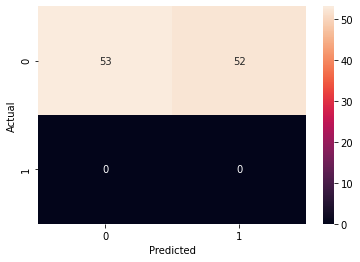

In [78]:
#0 is Empty
#1 is Occupied 
#2 is Trash

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot the confusion matrix as a heat map
ax = sns.heatmap(cfm, annot=True)
# Change the axis lables
ax.set(xlabel='Predicted', ylabel='Actual');